In [ ]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le_employement = LabelEncoder()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
os.chdir('/Users/admin/Desktop/AXA')
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
)
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier


from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter


from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot


2025-02-08 23:29:21.049056: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df=pd.read_csv('depression_data.csv')

In [5]:
def income_range(Income):
    if Income<20000:
        return 'Low Income'
    elif (Income > 20000) & (Income<100000):
        return 'Standard Income'
    elif Income >100000:
        return 'High Income'
df['Income_Range']=df['Income'].apply(income_range) 
df['Age_bin'] = pd.cut(df['Age'], bins=[-np.inf, 18, 35, 50, 65, np.inf], labels=['Under 18', '18-35', '36-50', '51-65', '65+'])

In [7]:
df.drop(['Name'], axis=1, inplace=True)
mentality_map = {'Yes': 1, 'No': 0}
df['History of Mental Illness'] = df['History of Mental Illness'].map(mentality_map)

In [9]:
from wolta.data_tools import col_types
types = col_types(df, print_columns=True)

from wolta.data_tools import make_numerics
types = col_types(df)
loc = 0
for col in df.columns:
    if types[loc] == 'str':
        df[col] = make_numerics(df[col])
    loc += 1

Age: int64
Marital Status: str
Education Level: str
Number of Children: int64
Smoking Status: str
Physical Activity Level: str
Employment Status: str
Income: float64
Alcohol Consumption: str
Dietary Habits: str
Sleep Patterns: str
History of Mental Illness: int64
History of Substance Abuse: str
Family History of Depression: str
Chronic Medical Conditions: str
Income_Range: str
Age_bin: str


In [11]:
feature_list=["Age","Income"]

In [103]:
nan_rows = df2[df2.isnull().T.any()]

In [121]:
cond = df['Income'].isin(df2['Income'])
df.drop(df[cond].index, inplace = True)

In [159]:
import numpy as np
import scipy.stats as stats
x = df['Age']
y = df['Income']
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [161]:
grubbs_test(x)
grubbs_test(y)


Grubbs Calculated Value: 1.7072064114629009
Grubbs Critical Value: 5.292133239995154
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: 3.922147256276752
Grubbs Critical Value: 5.292133239995154
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



In [79]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['Income'])

Outliers: [202449.17, 180084.56, 193843.44, 177029.4, 209894.25, 209701.03, 186628.22, 198181.05, 191332.82, 194966.84, 178888.69, 191355.0, 195808.54, 188948.61, 205667.11, 188959.66, 192549.68, 182674.63, 193728.26, 187952.71, 179833.47, 184364.84, 172815.65, 181429.45, 178388.81, 200510.82, 174478.06, 185111.15, 186350.89, 195896.74, 180593.87, 199360.52, 186766.81, 183726.93, 192958.5, 177183.05, 203522.89, 179550.03, 173351.65, 199005.59, 184228.03, 174186.56, 191858.69, 184938.77, 189470.2, 192893.48, 177281.07, 195061.0, 203828.41, 199967.63, 174800.22, 185314.8, 188326.76, 181452.52, 197331.57, 197820.88, 190655.69, 195946.18, 190951.91, 206406.6, 208318.63, 185536.39, 192553.67, 207520.91, 194994.51, 181563.57, 194341.9, 175495.99, 179959.57, 187486.48, 176041.63, 202986.8, 181910.54, 181342.44, 198105.94, 194423.39, 199877.95, 174333.17, 182128.64, 200404.87, 190914.54, 202237.8, 186489.47, 182414.51, 184391.82, 175255.2, 179387.75, 174614.97, 175353.74, 198490.25, 182146.57,

In [81]:
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['Income'])

Outliers: [202449.17, 180084.56, 193843.44, 177029.4, 209894.25, 209701.03, 186628.22, 198181.05, 191332.82, 194966.84, 178888.69, 191355.0, 195808.54, 188948.61, 205667.11, 188959.66, 192549.68, 182674.63, 193728.26, 187952.71, 179833.47, 184364.84, 172815.65, 181429.45, 178388.81, 200510.82, 174478.06, 185111.15, 186350.89, 195896.74, 180593.87, 199360.52, 186766.81, 183726.93, 192958.5, 177183.05, 203522.89, 179550.03, 173351.65, 199005.59, 184228.03, 174186.56, 191858.69, 184938.77, 189470.2, 192893.48, 177281.07, 195061.0, 203828.41, 199967.63, 174800.22, 185314.8, 188326.76, 181452.52, 197331.57, 197820.88, 190655.69, 195946.18, 190951.91, 206406.6, 208318.63, 185536.39, 192553.67, 207520.91, 194994.51, 181563.57, 194341.9, 175495.99, 179959.57, 187486.48, 176041.63, 202986.8, 181910.54, 181342.44, 198105.94, 194423.39, 199877.95, 174333.17, 182128.64, 200404.87, 190914.54, 202237.8, 186489.47, 182414.51, 184391.82, 175255.2, 179387.75, 174614.97, 175353.74, 198490.25, 182146.57,

In [83]:
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
ZRscore_outlier(df['Income'])

Outliers: [202449.17, 180084.56, 193843.44, 177029.4, 209894.25, 209701.03, 186628.22, 198181.05, 191332.82, 194966.84, 178888.69, 191355.0, 195808.54, 188948.61, 205667.11, 188959.66, 192549.68, 182674.63, 193728.26, 187952.71, 179833.47, 184364.84, 172815.65, 181429.45, 178388.81, 200510.82, 174478.06, 185111.15, 186350.89, 195896.74, 180593.87, 199360.52, 186766.81, 183726.93, 192958.5, 177183.05, 203522.89, 179550.03, 173351.65, 199005.59, 184228.03, 174186.56, 191858.69, 184938.77, 189470.2, 192893.48, 177281.07, 195061.0, 203828.41, 199967.63, 174800.22, 185314.8, 188326.76, 181452.52, 197331.57, 197820.88, 190655.69, 195946.18, 190951.91, 206406.6, 208318.63, 185536.39, 192553.67, 207520.91, 194994.51, 181563.57, 194341.9, 175495.99, 179959.57, 187486.48, 176041.63, 202986.8, 181910.54, 181342.44, 198105.94, 194423.39, 199877.95, 174333.17, 182128.64, 200404.87, 190914.54, 202237.8, 186489.47, 182414.51, 184391.82, 175255.2, 179387.75, 174614.97, 175353.74, 198490.25, 182146.57,

In [163]:
def ZRscore_outlier(df):
    out=[]
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)

In [17]:
out=[]
q1 = np.percentile(df['Income'] , 1)
q3 = np.percentile(df['Income'] , 99)
for i in df['Income']:
    if i > q3 or i < q1:
        out.append(i)

In [19]:
len(out)

8276

In [21]:
winzor_filtered_df= df[~df['Income'].isin(out)]

In [23]:
winzor_filtered_df

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Income_Range,Age_bin
0,31,0,0,2,0,0,0,26265.67,0,0,0,1,0,0,0,0,0
1,55,0,1,1,0,1,1,42710.36,1,1,0,1,0,1,0,0,1
2,78,1,2,1,0,1,1,125332.79,2,1,1,0,0,0,1,1,2
3,58,2,2,3,0,2,0,9992.78,0,0,2,0,0,1,1,2,1
4,18,3,1,0,0,1,0,8595.08,2,0,0,1,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,0,2,0,1,2,1,109233.43,2,2,1,0,0,1,1,1,2
413764,26,3,0,0,2,0,1,96760.97,2,2,2,1,1,1,0,0,0
413765,57,0,0,0,0,1,1,77353.26,0,0,0,0,0,0,0,0,1
413766,71,0,3,2,0,1,0,24557.08,0,0,2,0,1,1,1,0,2


In [97]:
iqr = 1.5 * (np.percentile(df['Income'], 75) - np.percentile(df['Income'], 25))
df.drop(df[df['Income'] > (iqr + np.percentile(df['Income'], 75))].index, inplace=True)
df.drop(df[df['Income'] < (np.percentile(df['Income'], 25) - iqr)].index, inplace=True)

In [27]:
X = winzor_filtered_df.drop('History of Mental Illness', axis=1)
y = winzor_filtered_df['History of Mental Illness']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [65]:
st_scaler = StandardScaler()
X_train_scaled = st_scaler.fit_transform(X_train)
X_test_scaled = st_scaler.transform(X_test)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Epoch 1/30
2535/2535 - 9s - 4ms/step - loss: 0.3387 - val_loss: 0.2201
Epoch 2/30
2535/2535 - 6s - 2ms/step - loss: 0.1895 - val_loss: 0.1295
Epoch 3/30
2535/2535 - 6s - 3ms/step - loss: 0.1272 - val_loss: 0.0913
Epoch 4/30
2535/2535 - 6s - 2ms/step - loss: 0.1001 - val_loss: 0.0747
Epoch 5/30
2535/2535 - 6s - 2ms/step - loss: 0.0833 - val_loss: 0.0580
Epoch 6/30
2535/2535 - 6s - 2ms/step - loss: 0.0727 - val_loss: 0.0518
Epoch 7/30
2535/2535 - 7s - 3ms/step - loss: 0.0665 - val_loss: 0.0475
Epoch 8/30
2535/2535 - 6s - 2ms/step - loss: 0.0618 - val_loss: 0.0439
Epoch 9/30
2535/2535 - 6s - 2ms/step - loss: 0.0582 - val_loss: 0.0430
Epoch 10/30
2535/2535 - 6s - 2ms/step - loss: 0.0557 - val_loss: 0.0411
Epoch 11/30
2535/2535 - 7s - 3ms/step - loss: 0.0542 - val_loss: 0.0389
Epoch 12/30
2535/2535 - 6s - 2ms/step - loss: 0.0515 - val_loss: 0.0353
Epoch 13/30
2535/2535 - 6s - 2ms/s

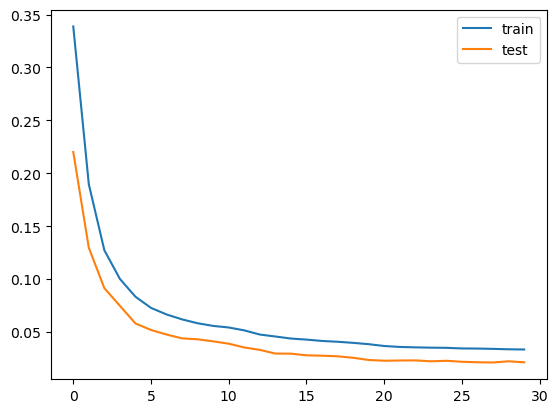

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [35]:
# number of input columns
n_inputs = X.shape[1]
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train_scaled, X_train_scaled, epochs=30, batch_size=128, verbose=2, validation_data=(X_test_scaled,X_test_scaled))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [37]:
# encode the train data
X_train_encode = encoder.predict(X_train_scaled)
# encode the test data
X_test_encode = encoder.predict(X_test_scaled)

10138/10138 ━━━━━━━━━━━━━━━━━━━━ 9s 877us/step
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [69]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
#class_weight={0: 0.745875802821399, 1: 1.5167734975596472}
model = RandomForestClassifier(class_weight=class_weight_dict)
# fit the model on the training set
model.fit(X_train_scaled, y_train)
# make predictions on the test set
y_hat = model.predict(X_test_scaled)
# calculate classification accuracy
acc = accuracy_score(y_test, y_hat)
print(acc)

# Calculate metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_hat))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_hat))
print('The weighted f1 score for the testing data:', f1)

0.6699342778579267
Accuracy: 0.6699
Precision: 0.5939
Recall: 0.6699
F1 Score: 0.6005
Confusion Matrix (original predictions):
[[51865  4571]
 [22197  2466]]

Classification Report (original predictions):
              precision    recall  f1-score   support

           0       0.70      0.92      0.79     56436
           1       0.35      0.10      0.16     24663

    accuracy                           0.67     81099
   macro avg       0.53      0.51      0.48     81099
weighted avg       0.59      0.67      0.60     81099

The weighted f1 score for the testing data: 0.6004623693639509


In [73]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
# on the transformed data
#DT= DecisionTreeClassifier(criterion="gini", max_depth=30,class_weight='balanced')
#sgd=SGDClassifier(penalty="elasticnet", alpha=0.0001, l1_ratio=0.15,max_iter=1000, tol=1e-3, class_weight=class_weight_dict,random_state=42)
#rfc = RandomForestClassifier(class_weight={0: 0.745875802821399, 1: 1.5167734975596472},max_features='sqrt')
#class_weight={0: 0.745875802821399, 1: 1.5167734975596472}
lr = LogisticRegression(class_weight=class_weight_dict)
# Fit the classifier
lr.fit(X_train_scaled, y_train)
# Make predictions
y_hat = lr.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_hat))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_hat))
print('The weighted f1 score for the testing data:', f1)

Accuracy: 0.6065
Precision: 0.6368
Recall: 0.6065
F1 Score: 0.6177
Confusion Matrix (original predictions):
[[37085 19351]
 [12565 12098]]

Classification Report (original predictions):
              precision    recall  f1-score   support

           0       0.75      0.66      0.70     56436
           1       0.38      0.49      0.43     24663

    accuracy                           0.61     81099
   macro avg       0.57      0.57      0.57     81099
weighted avg       0.64      0.61      0.62     81099

The weighted f1 score for the testing data: 0.6176663450455244


In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
print('AUC = %.2f' % roc_auc_score(y_test, y_hat))  #1

metrics.roc_curve(y_test, y_hat)  #2
plt.show()

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

AUC = 0.57


NameError: name 'metrics' is not defined

In [79]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
xgb=CatBoostClassifier(n_estimators=320, max_depth=1, learning_rate=1,class_weights=class_weight_dict)
# Fit the classifier  objective='binary:logistic'
xgb.fit(X_train_scaled, y_train)
# Make predictions
y_hat = xgb.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_hat))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_hat))
print('The weighted f1 score for the testing data:', f1)
print('AUC = %.2f' % roc_auc_score(y_test, y_hat))  #1

metrics.roc_curve(y_hat, y_test)  #2
plt.show()

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

0:	learn: 0.6817284	total: 90.9ms	remaining: 29s
1:	learn: 0.6793544	total: 115ms	remaining: 18.3s
2:	learn: 0.6787056	total: 140ms	remaining: 14.8s
3:	learn: 0.6785446	total: 156ms	remaining: 12.3s
4:	learn: 0.6784423	total: 173ms	remaining: 10.9s
5:	learn: 0.6783867	total: 191ms	remaining: 9.97s
6:	learn: 0.6783056	total: 208ms	remaining: 9.32s
7:	learn: 0.6782739	total: 226ms	remaining: 8.83s
8:	learn: 0.6782310	total: 244ms	remaining: 8.43s
9:	learn: 0.6782490	total: 263ms	remaining: 8.16s
10:	learn: 0.6782299	total: 281ms	remaining: 7.9s
11:	learn: 0.6781769	total: 299ms	remaining: 7.68s
12:	learn: 0.6782016	total: 338ms	remaining: 7.98s
13:	learn: 0.6781483	total: 388ms	remaining: 8.48s
14:	learn: 0.6781479	total: 420ms	remaining: 8.53s
15:	learn: 0.6781260	total: 450ms	remaining: 8.56s
16:	learn: 0.6781041	total: 481ms	remaining: 8.57s
17:	learn: 0.6780909	total: 538ms	remaining: 9.02s
18:	learn: 0.6780846	total: 575ms	remaining: 9.11s
19:	learn: 0.6780651	total: 602ms	remaining

NameError: name 'metrics' is not defined

In [77]:
from sklearn import svm
from sklearn import linear_model
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
est = svm.LinearSVC(loss ='hinge' ,random_state=0,max_iter=1000000, C=1,class_weight=class_weight_dict)

est.fit(X_train_scaled, y_train)
y_hat = est.predict(X_test_scaled)
# Calculate metrics
accuracy = accuracy_score(y_test, y_hat)

accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_hat))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_hat))
print('The weighted f1 score for the testing data:', f1)

Accuracy: 0.6184
Precision: 0.6369
Recall: 0.6184
F1 Score: 0.6261
Confusion Matrix (original predictions):
[[38836 17600]
 [13348 11315]]

Classification Report (original predictions):
              precision    recall  f1-score   support

           0       0.74      0.69      0.72     56436
           1       0.39      0.46      0.42     24663

    accuracy                           0.62     81099
   macro avg       0.57      0.57      0.57     81099
weighted avg       0.64      0.62      0.63     81099

The weighted f1 score for the testing data: 0.6260655660499016
